In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.float_format', '{:,.5f}'.format)

In [3]:
df_Risk_Engine=pd.read_csv('data-Risk_Profile_mp_wb.csv')
df_Risk_Engine.head(20)

,Mask Pin,tax_payer_name,station_name,trp_no,trp_period_year,turnover,total_tax_payable,tax_turnover_ratio,turnover_band,industry_total,TTR-Industry-Average,Deviation
0,*******094V,THE STANDARD GROUP PLC,LTO,KRA202453244492,2023,"1,821,464,000",-,0.00000,L,0.01000,0,#DIV/0!
1,*******095W,East African Breweries PLC,LTO,KRA202321886098,2023,-,-,NaN,SM,"2,669.82000",#VALUE!,#VALUE!
2,*******096X,Kenya Power & Lighting Company Ltd,LTO,KRA202321542602,2023,"192,419,549,000","293,491,227",0.00150,L,0.01000,2.288853E-06,-654.35
3,*******100Y,The Karen Country Club Limited,MTO,KRA202425377871,2023,-,"7,666,029",NaN,SM,"2,669.82000",#VALUE!,#VALUE!
4,*******111Y,Mantrac Kenya Limited,LTO,KRA202454060349,2023,"2,934,253,000","20,305,848",0.00690,L,0.01000,1.05287E-05,-654.35
5,*******112Z,The Limuru Tea Company Limited,East of Nairobi,KRA202445279066,2023,"153,427,000","4,697,756",0.03060,SM,"2,669.82000",1.7489E-10,-174966652.7
6,*******113A,KAKUZI PLC,LTO,KRA202432742240,2023,"5,461,909,844","119,456,958",0.02190,L,0.01000,3.34173E-05,-654.35
7,*******120C,Woolworths Limited,West of Nairobi,KRA202433709627,2023,"508,185","152,456",0.30000,SM,"2,669.82000",1.71461E-09,-174966652.7
8,*******123F,UNGA GROUP PLC,LTO,KRA202321765423,2023,-,"9,014",NaN,SM,"2,669.82000",#VALUE!,#VALUE!
9,*******126I,Kaisugu Limited,LTO,KRA202446764811,2023,"1,546,693,660","66,681,895",0.04310,L,0.01000,6.57664E-05,-654.35


In [4]:
df_Risk_Engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mask Pin              65535 non-null  object 
 1   tax_payer_name        65535 non-null  object 
 2   station_name          65535 non-null  object 
 3   trp_no                65535 non-null  object 
 4   trp_period_year       65535 non-null  int64  
 5    turnover             65535 non-null  object 
 6    total_tax_payable    65535 non-null  object 
 7   tax_turnover_ratio    57189 non-null  float64
 8   turnover_band         65535 non-null  object 
 9   industry_total        65535 non-null  float64
 10  TTR-Industry-Average  65535 non-null  object 
 11  Deviation             65535 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 6.0+ MB


In [5]:
total_taxpayers=df_Risk_Engine['tax_payer_name'].drop_duplicates().count()

In [6]:
total_taxpayers

65305

CREATING THE TOTAL TURNOVER INDUSTRY AVERAGE COLUMN

CREATING THE DEVIATION COLUMN

In [7]:
df_Risk_Engine['Deviation'] = (df_Risk_Engine['industry_total'] - df_Risk_Engine['tax_turnover_ratio']) / df_Risk_Engine['industry_total']

In [8]:
df_Risk_Engine.replace(' -   ', np.nan, inplace=True)

REPLACING #VALUE AND #DIV/0 TO NULL VALUES

In [9]:
# Replace '#VALUE!' and '#DIV/0!' errors in 'Deviation' and 'TTR-Industry-Average'
df_Risk_Engine.replace({'#VALUE!': np.nan, '#DIV/0!': np.nan}, inplace=True)

CONVERTING TO FLOAT

In [10]:
df_Risk_Engine[' turnover '] = df_Risk_Engine[' turnover '].str.replace(',','', regex=True).astype('float64')
df_Risk_Engine[' total_tax_payable '] = df_Risk_Engine[' total_tax_payable '].str.replace(',','', regex=True).astype('float64')

In [11]:
df_Risk_Engine.head(30)

,Mask Pin,tax_payer_name,station_name,trp_no,trp_period_year,turnover,total_tax_payable,tax_turnover_ratio,turnover_band,industry_total,TTR-Industry-Average,Deviation
0,*******094V,THE STANDARD GROUP PLC,LTO,KRA202453244492,2023,"1,821,464,000.00000",NaN,0.00000,L,0.01000,0,1.00000
1,*******095W,East African Breweries PLC,LTO,KRA202321886098,2023,NaN,NaN,NaN,SM,"2,669.82000",NaN,NaN
2,*******096X,Kenya Power & Lighting Company Ltd,LTO,KRA202321542602,2023,"192,419,549,000.00000","293,491,227.00000",0.00150,L,0.01000,2.288853E-06,0.85000
3,*******100Y,The Karen Country Club Limited,MTO,KRA202425377871,2023,NaN,"7,666,029.00000",NaN,SM,"2,669.82000",NaN,NaN
4,*******111Y,Mantrac Kenya Limited,LTO,KRA202454060349,2023,"2,934,253,000.00000","20,305,848.00000",0.00690,L,0.01000,1.05287E-05,0.31000
5,*******112Z,The Limuru Tea Company Limited,East of Nairobi,KRA202445279066,2023,"153,427,000.00000","4,697,756.00000",0.03060,SM,"2,669.82000",1.7489E-10,0.99999
6,*******113A,KAKUZI PLC,LTO,KRA202432742240,2023,"5,461,909,844.00000","119,456,958.00000",0.02190,L,0.01000,3.34173E-05,-1.19000
7,*******120C,Woolworths Limited,West of Nairobi,KRA202433709627,2023,"508,185.00000","152,456.00000",0.30000,SM,"2,669.82000",1.71461E-09,0.99989
8,*******123F,UNGA GROUP PLC,LTO,KRA202321765423,2023,NaN,"9,014.00000",NaN,SM,"2,669.82000",NaN,NaN
9,*******126I,Kaisugu Limited,LTO,KRA202446764811,2023,"1,546,693,660.00000","66,681,895.00000",0.04310,L,0.01000,6.57664E-05,-3.31000


DROPPING NULL VALUES AND DUPLICATES

In [12]:
df_Risk_Engine.dropna(inplace=True)

In [13]:
df_Risk_Engine.drop_duplicates(inplace=True)

In [14]:
df_Risk_Engine.shape

(34229, 12)

In [15]:
df_Risk_Engine.columns

Index(['Mask Pin', 'tax_payer_name', 'station_name', 'trp_no',
       'trp_period_year', ' turnover ', ' total_tax_payable ',
       'tax_turnover_ratio', 'turnover_band', 'industry_total',
       'TTR-Industry-Average', 'Deviation'],
      dtype='object')

In [16]:
df_Risk_Engine.head(10)

,Mask Pin,tax_payer_name,station_name,trp_no,trp_period_year,turnover,total_tax_payable,tax_turnover_ratio,turnover_band,industry_total,TTR-Industry-Average,Deviation
2,*******096X,Kenya Power & Lighting Company Ltd,LTO,KRA202321542602,2023,"192,419,549,000.00000","293,491,227.00000",0.00150,L,0.01000,2.288853E-06,0.85000
4,*******111Y,Mantrac Kenya Limited,LTO,KRA202454060349,2023,"2,934,253,000.00000","20,305,848.00000",0.00690,L,0.01000,1.05287E-05,0.31000
5,*******112Z,The Limuru Tea Company Limited,East of Nairobi,KRA202445279066,2023,"153,427,000.00000","4,697,756.00000",0.03060,SM,"2,669.82000",1.7489E-10,0.99999
6,*******113A,KAKUZI PLC,LTO,KRA202432742240,2023,"5,461,909,844.00000","119,456,958.00000",0.02190,L,0.01000,3.34173E-05,-1.19000
7,*******120C,Woolworths Limited,West of Nairobi,KRA202433709627,2023,"508,185.00000","152,456.00000",0.30000,SM,"2,669.82000",1.71461E-09,0.99989
9,*******126I,Kaisugu Limited,LTO,KRA202446764811,2023,"1,546,693,660.00000","66,681,895.00000",0.04310,L,0.01000,6.57664E-05,-3.31000
14,*******139N,Maganlal Stores Limited,West of Nairobi,KRA202462237767,2023,"55,235,122.00000","1,788,170.00000",0.03240,SM,"2,669.82000",1.85178E-10,0.99999
15,*******141H,THE EAST AFRICAN PORTLAND CEMENT CO. LIMITED,LTO,KRA202321878983,2023,"2,968,078,457.00000","4,351,637.00000",0.00150,L,0.01000,2.28885E-06,0.85000
16,*******142I,Kingfisher Properties Limited,South of Nairobi,KRA202453911571,2023,"65,358,144.00000","1,586,352.00000",0.02430,SM,"2,669.82000",1.38884E-10,0.99999
17,*******147N,TIMSALES LIMITED,LTO,KRA202451481320,2023,"3,473,423,228.00000","17,076,164.00000",0.00490,L,0.01000,7.47692E-06,0.51000


REMOVING THE COLUMNS WE DON'T REALLY NEED

In [17]:
df_Risk_Engine.drop(columns=['Mask Pin','tax_payer_name','station_name','trp_no','trp_period_year','TTR-Industry-Average'], axis=1, inplace=True)

In [18]:
features = pd.get_dummies(df_Risk_Engine)

IMPORTING THE K-MEANS LIBRARIES

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Select relevant features
#features = df_Risk_Engine

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [21]:
# Determine optimal K using the Elbow Method
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

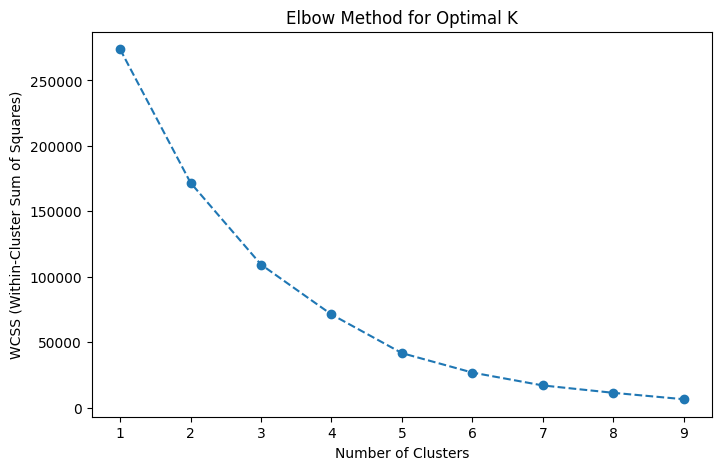

In [22]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
# # Fit K-Means with optimal K (choose based on elbow point)
# optimal_k = 4  # Change based on elbow method result
# kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# df_Risk_Engine['Risk_Cluster'] = kmeans.fit_predict(scaled_features)

In [23]:
# Fit K-Means with optimal K (choose based on elbow point)
optimal_k = 4  # Change based on elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_features)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [24]:
df = pd.DataFrame(scaled_features, columns=features.columns)

In [25]:
df['class'] = kmeans.labels_

In [26]:
df.head(30)

,turnover,total_tax_payable,tax_turnover_ratio,industry_total,Deviation,turnover_band_L,turnover_band_ME,turnover_band_SM,class
0,38.93254,1.15022,-0.00947,-2.69331,0.00980,5.45978,-0.31198,-2.69331,2
1,0.53000,0.05009,-0.00947,-2.69331,0.00802,5.45978,-0.31198,-2.69331,2
2,-0.03359,-0.01277,-0.00947,0.37129,0.01029,-0.18316,-0.31198,0.37129,0
3,1.04227,0.44937,-0.00947,-2.69331,0.00309,5.45978,-0.31198,-2.69331,2
4,-0.06458,-0.03107,-0.00947,0.37129,0.01029,-0.18316,-0.31198,0.37129,0
5,0.24878,0.23685,-0.00947,-2.69331,-0.00387,5.45978,-0.31198,-2.69331,2
6,-0.05349,-0.02448,-0.00947,0.37129,0.01029,-0.18316,-0.31198,0.37129,0
7,0.53685,-0.01416,-0.00947,-2.69331,0.00980,5.45978,-0.31198,-2.69331,2
8,-0.05144,-0.02530,-0.00947,0.37129,0.01029,-0.18316,-0.31198,0.37129,0
9,0.63927,0.03708,-0.00947,-2.69331,0.00868,5.45978,-0.31198,-2.69331,2


VISUALIZING THE CLUSTERS

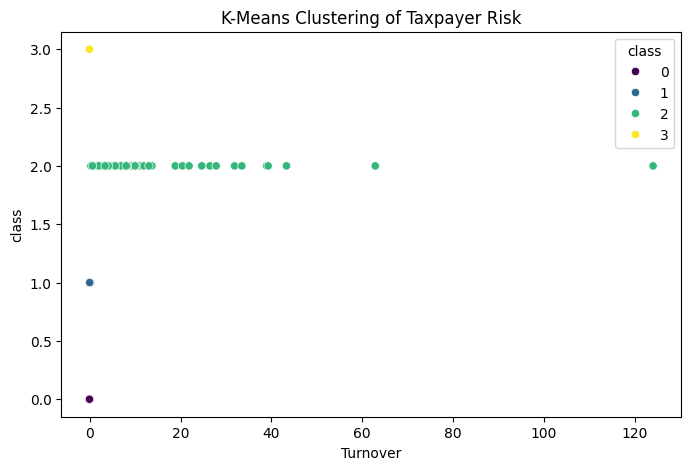

In [27]:
# Visualize the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[' turnover '], 
                y=df['class'], 
                hue=df['class'], 
                palette='viridis')
plt.xlabel('Turnover')
plt.ylabel('class')
plt.title('K-Means Clustering of Taxpayer Risk')
plt.show()

Interpretation of the K-Means Clustering Plot:
The x-axis represents Turnover (financial activity of taxpayers). The y-axis represents Cluster Class (assigned risk category by K-Means).


Cluster Breakdown:
Cluster 0 (Purple, Class 0) – Very Low Turnover. These taxpayers have almost no financial activity.Likely small businesses or inactive accounts. Likely small businesses or inactive accounts.

Cluster 1 (Blue, Class 1) – Low Turnover, Taxpayers with minimal turnover.They may require closer monitoring to ensure accurate tax reporting.

Cluster 2 (Green, Class 2) – Moderate Turnover, These are mid-sized taxpayers with average turnover. 
Their risk level depends on additional tax compliance metrics.

Cluster 3 (Yellow, Class 3) – High Turnover, generate the highest revenue. Their compliance level should be verified, but they are likely well-regulated.

Insights:
The majority of taxpayers fall into Class 3 (Yellow, high turnover). There are a few outliers in Class 0, 1, and 2 with significantly lower turnover. There are a few outliers in Class 0, 1, and 2 with significantly lower turnover.

Further investigation is needed into low-turnover taxpayers to detect potential tax fraud or non-compliance.

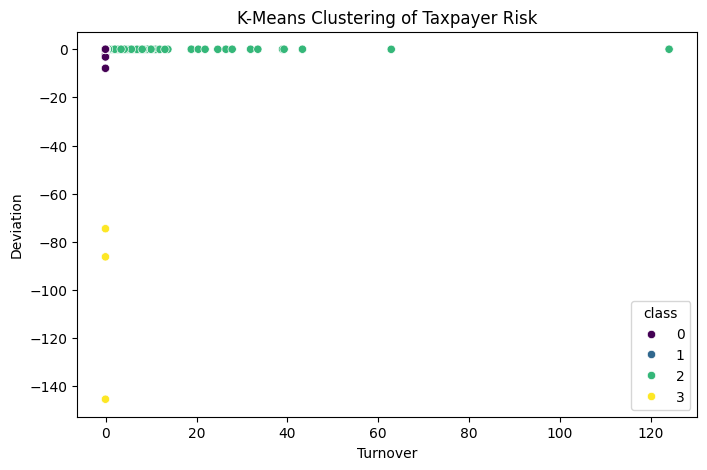

In [28]:
# Visualize the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[' turnover '], 
                y=df['Deviation'], 
                hue=df['class'], 
                palette='viridis')
plt.xlabel('Turnover')
plt.ylabel('Deviation')
plt.title('K-Means Clustering of Taxpayer Risk')
plt.show()

Interpretation of the K-Means Clustering Plot:
The x-axis represents Turnover. The y-axis represents Deviation (how much a taxpayer's financial behavior deviates from industry norms).

Cluster Breakdown:
Cluster 0 (Purple) – Low Turnover, Low Deviation. These taxpayers have low financial activity and are mostly compliant. They may be small businesses or inactive taxpayers.

Cluster 1 (Blue) – Low Turnover, High Deviation. These entities have minimal revenue but a very high deviation from the expected norm. Possible high-risk cases for non-compliance, underreporting, or fraudulent activity.

Cluster 2 (Green) – Moderate Turnover, Moderate Deviation. This group falls in the middle range of financial performance and risk. They may require periodic monitoring but are not immediate concerns.

Cluster 3 (Yellow) – High Turnover, Low Deviation. These are large taxpayers with high turnover.Their deviation is mostly close to zero, meaning they likely follow tax regulations. However, a few outliers exist, which might require deeper analysis.

